## Check labels in GT 2D slices

In [3]:
import numpy as np
from PIL import Image

def check_unique_labels(gt_path):
    # Load the ground truth image (assuming it's in .png format)
    gt = np.array(Image.open(gt_path))

    # Get the unique values (labels) in the ground truth image
    unique_labels = np.unique(gt)

    # Print the unique labels
    print(f"Unique labels in the ground truth: {unique_labels}")

# Example usage
gt_path = '../data/SEGTHOR/train/gt/Patient_03_0049.png' #gt_path = 'data\SEGTHOR/train\gt\Patient_25_0055.png'
check_unique_labels(gt_path)

Unique labels in the ground truth: [  0  63 126 252]


## Find GT with all 4 organs

In [4]:
from pathlib import Path
import numpy as np
from PIL import Image

def find_image_with_4_unique_labels(gt_dir):
    """
    Iterate over all ground truth images in a folder and return the name of the image
    that contains exactly 4 unique labels.
    """
    gt_dir = Path(gt_dir)
    gt_paths = sorted(gt_dir.glob("*.png"))

    for gt_path in gt_paths:
        # Load the ground truth image as a numpy array
        gt = np.array(Image.open(gt_path))

        # Get the unique labels in the ground truth
        unique_labels = np.unique(gt)

        # Check if the image contains exactly 4 unique labels
        if len(unique_labels) == 5:
            print(f"Found image with 4 unique labels: {gt_path.name}")
            print(f"Unique labels in the image: {unique_labels}")
            return gt_path.name

    # If no image with 4 unique labels is found
    print("No image with exactly 4 unique labels was found.")
    return None

# Example usage
gt_dir = '../data/SEGTHOR/train/gt'
image_name = find_image_with_4_unique_labels(gt_dir)

if image_name:
    print(f"The image with 4 unique labels is: {image_name}")


Found image with 4 unique labels: Patient_18_0102.png
Unique labels in the image: [  0  63 126 189 252]
The image with 4 unique labels is: Patient_18_0102.png


## Body mask

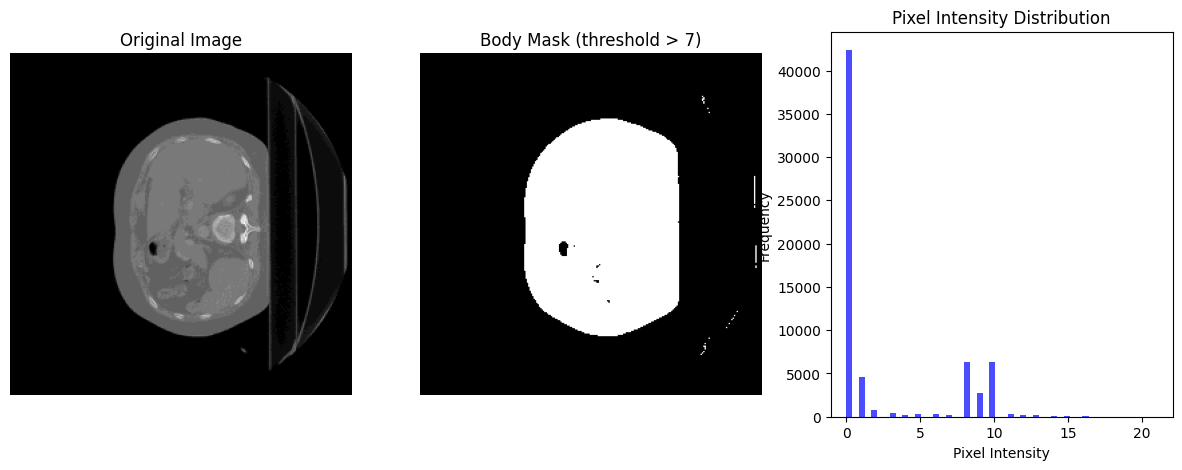

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_body_mask(image_path, threshold=10):
    # Load the image
    image = np.array(Image.open(image_path))

    # Apply threshold
    body_mask = image > threshold

    # Plot original image and mask side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original Image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Body Mask
    axes[1].imshow(body_mask, cmap='gray')
    axes[1].set_title(f'Body Mask (threshold > {threshold})')
    axes[1].axis('off')

    # Plot histogram of pixel intensities
    axes[2].hist(image.flatten(), bins=50, color='blue', alpha=0.7)
    axes[2].set_title('Pixel Intensity Distribution')
    axes[2].set_xlabel('Pixel Intensity')
    axes[2].set_ylabel('Frequency')

    plt.show()

# Example usage
image_path = '../data/SEGTHOR/train/img/Patient_03_0015.png'
visualize_body_mask(image_path, threshold=7)

## Check distribution of classes in traning images

In [17]:
import numpy as np
from pathlib import Path
from skimage.io import imread
from collections import defaultdict
import argparse

# Define valid class labels (change according to your setup)
VALID_LABELS = {0: 'background', 63: 'esophagus', 126: 'heart', 189: 'trachea', 252: 'aorta'}

def count_images_per_class(gt_dir):
    """
    Count how many images contain each class in the ground truth directory.

    Args:
        gt_dir (Path): Path to the directory containing ground truth masks.

    Returns:
        class_counts (dict): Dictionary containing the count of images for each class.
    """
    class_counts = defaultdict(int)

    # Get sorted list of ground truth mask files
    gt_paths = sorted(list(gt_dir.glob("*.png")))

    for gt_path in gt_paths:
        # Load the ground truth mask
        gt = np.array(imread(gt_path))

        # Check which classes are present in the ground truth
        for label in VALID_LABELS.keys():
            if label in gt:
                class_counts[label] += 1

    return class_counts

# Define the ground truth directory
data_dir = Path("../data/SEGTHOR")
train_gt_dir = data_dir / "train" / "gt"

# Count the number of images per class
class_counts = count_images_per_class(train_gt_dir)

# Print the results
for label, count in class_counts.items():
    print(f"Class {VALID_LABELS[label]} ({label}): {count} images")

Class background (0): 5453 images
Class aorta (252): 2797 images
Class esophagus (63): 2942 images
Class heart (126): 1203 images
Class trachea (189): 1495 images
